<h1 align = "center"> Linear Regression using Gradient Descent </h1>

 Importing Required Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Reading in data appropriately

In [2]:
data = pd.read_csv("ex1data1.txt", names = ['X', 'y'] )

In [3]:
data.head()

,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0, 0.5, 'Profit in 10,000 USD')

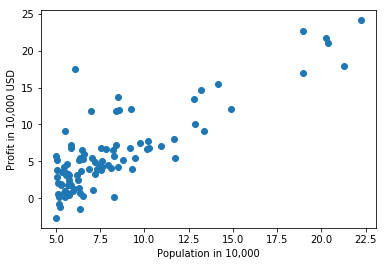

In [4]:
X = data[['X']]
y = data['y']
plt.figure()
plt.plot(X, y, 'o')
plt.xlabel("Population in 10,000")
plt.ylabel("Profit in 10,000 USD")

In [5]:
# Data preprocessing, adding intercept term.
m = len(y)
X['intercept'] = 1
X = X[['intercept', 'X']]
X = np.asarray(X)
y = np.asarray(y)

In [6]:
# Setting initial Thetas to 0
theta = np.zeros(X.shape[1])

In [9]:
# Calculate cost at initial Theta (Cost defined later)
print("Cost at initial theta: %0.2f"% cost(X, y, theta))

Cost at initial theta: 32.07


Required functions for linear regression

In [8]:
# To calculate the value of cost function
def cost(X, y, theta):
    error = X.dot(theta) - y
    cost = (1/(2*m)) * np.sum(np.power(error, 2))
    return cost

In [10]:
# To perform Gradient Descent
def gradDesc(X, y, alpha, iter):
    theta = np.zeros(X.shape[1])
    cost_iter = list()
    for i in range(iter):
        error = X.dot(theta) - y
        theta = theta - ((alpha/m) * X.T.dot(error))
        cost_iter.append(cost(X, y, theta))
    return theta, cost_iter
        

Implementing Linear Regression

In [11]:
# Initialise theta, alpha and number of iterations for gradient descent
alpha = 0.01
iterations = 1400

In [12]:
# Split data into training and testing sets
msk = np.random.rand(len(X)) < 0.8
X_train = X[msk]
X_test = X[~msk]
y_train = y[msk]
y_test = y[~msk]
#Can  also be done by train_test_split()

In [13]:
# Training the data
theta, cost_iter = gradDesc(X_train, y_train, alpha, iterations)

Text(0, 0.5, 'Cost function')

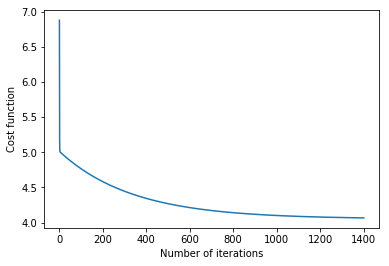

In [14]:
# To show variation of cost function with number of iterations
plt.figure()
plt.plot(range(1,iterations+1), cost_iter)
plt.xlabel("Number of iterations")
plt.ylabel("Cost function")

In [15]:
# Predictions on training and test data
y_train_hat = X_train.dot(theta)
y_test_hat = X_test.dot(theta)

Plotting Predictions

Text(0, 0.5, 'Profit in 10,000 USD')

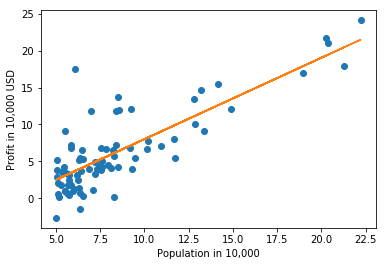

In [16]:
# Plot prediction of training data
plt.figure()
plt.plot(X_train[:,1], y_train, 'o')
plt.plot(X_train[:,1], y_train_hat)
plt.xlabel("Population in 10,000")
plt.ylabel("Profit in 10,000 USD")

Text(0, 0.5, 'Profit in 10,000 USD')

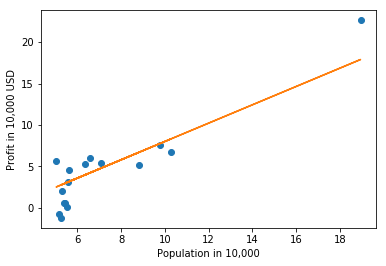

In [17]:
# Plot prediction of test data
plt.figure()
plt.plot(X_test[:,1], y_test, 'o')
plt.plot(X_test[:,1], y_test_hat)
plt.xlabel("Population in 10,000")
plt.ylabel("Profit in 10,000 USD")

Evaluation

In [18]:
print("Mean absolute error(training): %.2f" % np.mean(np.absolute(y_train_hat - y_train)))
print("Residual sum of squares (MSE)(training): %.2f" % np.mean((y_train_hat - y_train) ** 2))

Mean absolute error(training): 2.29
Residual sum of squares (MSE)(training): 9.74


In [19]:
print("Mean absolute error(testing): %.2f" % np.mean(np.absolute(y_test_hat - y_test)))
print("Residual sum of squares (MSE)(testing): %.2f" % np.mean((y_test_hat - y_test) ** 2))

Mean absolute error(testing): 2.01
Residual sum of squares (MSE)(testing): 5.77
